# **the main objective of this code is to implement PCA from scratch**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/sample_data/train (1).csv')#this data is taken from kaggle
df.head(10)
print(df.shape[1])

81


#data Cleaning

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

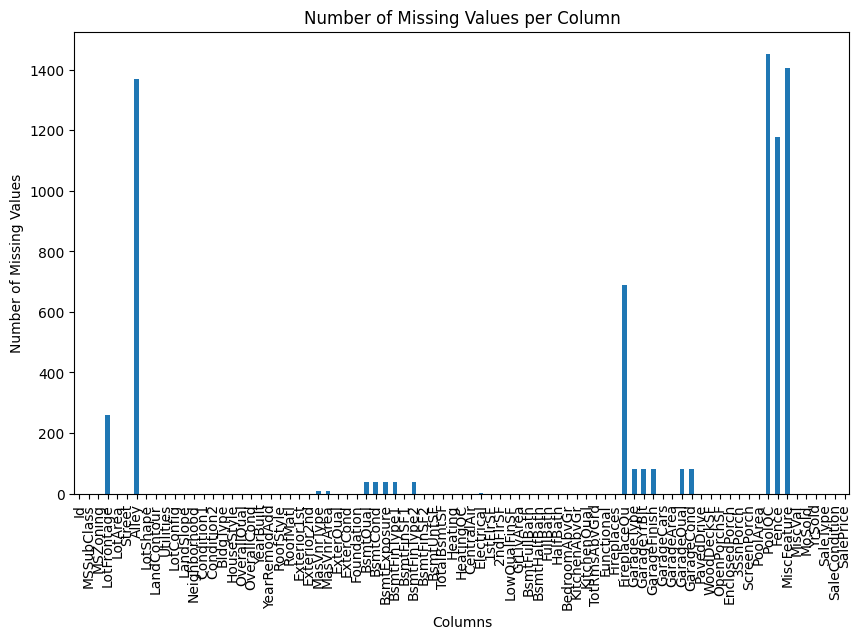

In [ ]:
missing_values_count = df.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar')
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [ ]:
len(df)

1460

In [ ]:
columns_to_drop=df.columns[df.isnull().sum() > 200]
print(columns_to_drop)

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [ ]:
df = df.drop(columns=columns_to_drop)
df.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [ ]:
df.dropna(inplace=True)
len(df)

1338

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1338.0,731.228700,421.779691,1.0,366.25,730.5,1098.75,1460.0
MSSubClass,1338.0,56.136024,41.252576,20.0,20.00,50.0,70.00,190.0
LotArea,1338.0,10706.294469,10336.621126,1300.0,7744.00,9600.0,11760.75,215245.0
OverallQual,1338.0,6.219731,1.324472,2.0,5.00,6.0,7.00,10.0
OverallCond,1338.0,5.596413,1.078124,2.0,5.00,5.0,6.00,9.0
YearBuilt,1338.0,1973.029148,29.563540,1880.0,1956.00,1976.0,2001.00,2010.0
YearRemodAdd,1338.0,1985.668909,20.296463,1950.0,1968.00,1994.5,2004.00,2010.0
MasVnrArea,1338.0,110.360239,185.604816,0.0,0.00,0.0,174.00,1600.0
BsmtFinSF1,1338.0,464.234679,458.792420,0.0,0.00,413.0,733.00,5644.0
BsmtFinSF2,1338.0,49.218236,166.196584,0.0,0.00,0.0,0.00,1474.0


In [ ]:
df.dtypes
print(df.shape[1])

75


In [ ]:
# One-hot encode categorical columns
categorical_columns=df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df[categorical_columns])
print(df_encoded.columns)

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=229)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df = df.drop(columns=['Id'])
print(df.shape[1])

74


# PCA from Scratch
**STEPS**

1. **Standardize the data**: Scale the features so that they have a mean of 0 and a standard deviation of 1.

2. **Compute the covariance matrix**: Calculate the covariance matrix of the standardized data.

3. **Compute the eigenvectors and eigenvalues**: Decompose the covariance matrix to obtain its eigenvectors and eigenvalues.

4. **Select principal components**: Sort the eigenvectors based on their corresponding eigenvalues and select the top k eigenvectors to form the principal components.

5. **Project the data onto the new feature space**: Multiply the original data by the selected principal components to obtain the projected data.


#1) Standardize the data

In [ ]:
#standarising data
mean = np.mean(df, axis=0)
std = np.std(df, axis=0)
df_scaled = (df - mean) / std

#2) Compute the covariance matrix

In [ ]:
mean_vector = np.mean(df_scaled, axis=0)
centered_data = df_scaled - mean_vector
covariance_matrix = np.dot(centered_data.T, centered_data) / df_scaled.shape[0]
covariance_matrix.shape

(74, 74)

#3) Compute the eigenvectors and eigenvalues

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues

array([ 1.11063005e+01,  4.12248772e+00,  3.72518798e+00,  3.00789252e+00,
        2.24050765e+00,  2.09894651e+00,  1.80433206e+00,  1.71652205e+00,
        1.57383372e+00,  1.52874809e+00,  1.42058443e+00,  1.37166924e+00,
        1.35422436e+00,  1.31873204e+00,  1.23157685e+00,  1.19586698e+00,
        1.17897475e+00,  1.14469666e+00,  1.10619747e+00,  1.09578265e+00,
        1.07777868e+00,  1.06600776e+00,  1.03877674e+00,  7.54479888e-02,
        8.80830021e-02,  1.02022179e+00,  9.98648738e-01,  9.77458746e-01,
        1.02774773e-01,  1.16676651e-01,  1.30159173e-01,  1.43276184e-01,
        1.55888088e-01,  9.29969299e-01,  9.17299607e-01,  1.94704270e-01,
        2.06348654e-01,  2.31067682e-01,  2.44582071e-01,  2.67433397e-01,
        3.07361443e-01,  3.17527692e-01,  3.26065474e-01,  8.84595511e-01,
        8.64565261e-01,  3.56097855e-01,  3.64491483e-01,  3.84368467e-01,
        3.91979769e-01,  4.07487672e-01,  4.14650548e-01,  4.23058445e-01,
        4.52179233e-01,  

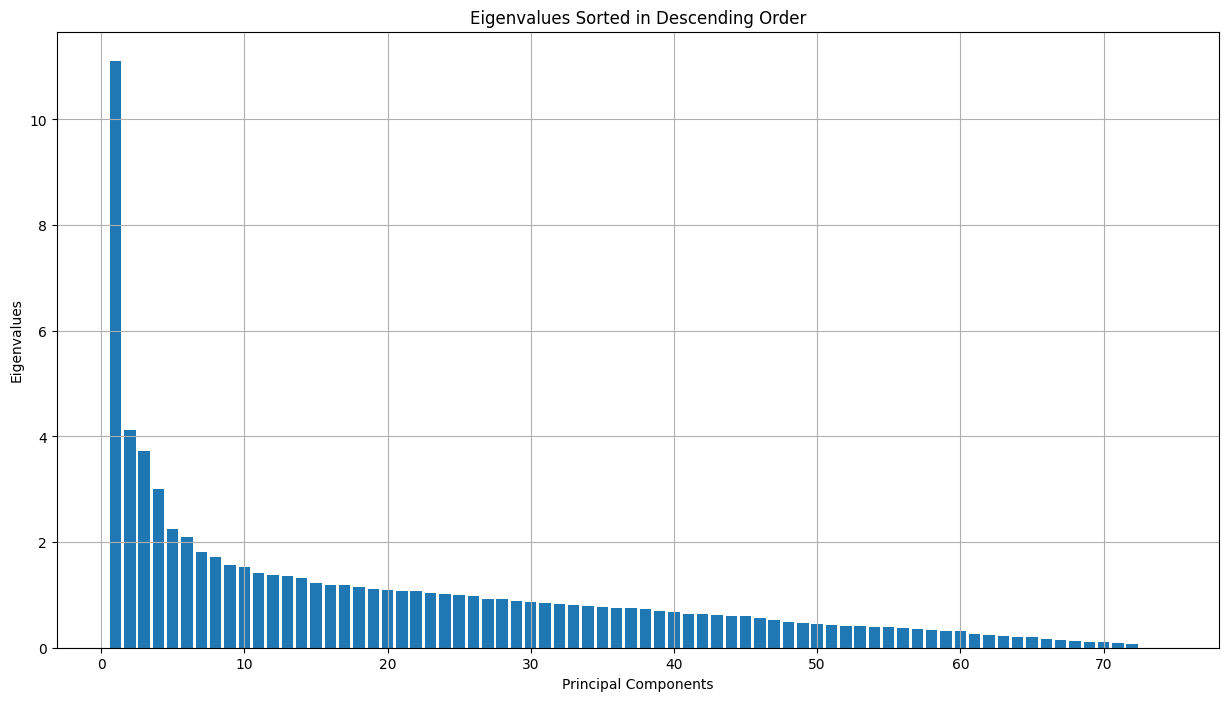

In [ ]:
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
plt.figure(figsize=(15, 8))
plt.bar(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues)
plt.title('Eigenvalues Sorted in Descending Order')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

In [ ]:
total_variance = np.sum(eigenvalues)
explained_variance = eigenvalues / total_variance
explained_variance=sorted(explained_variance)[::-1]

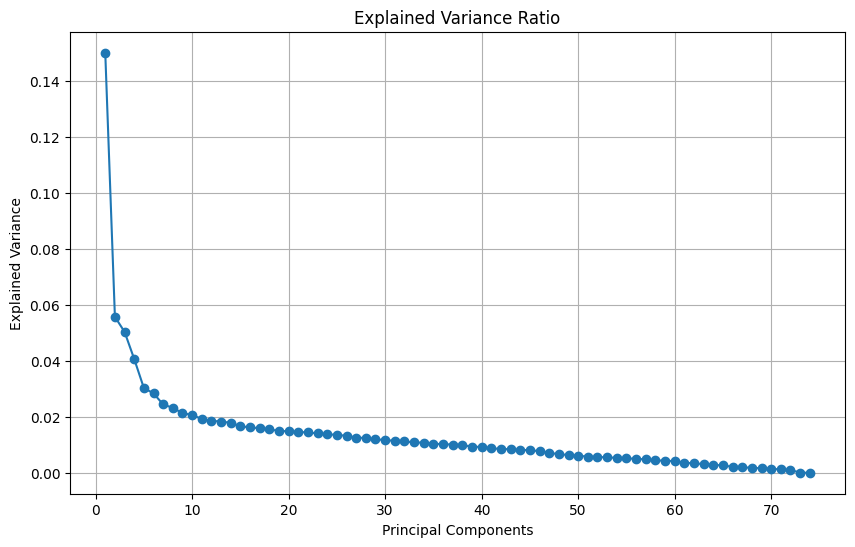

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

**Note that**:

Given $\lambda_i$ as the eigenvalue corresponding to the $i$-th principal component, and $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_n$ where $n$ is the number of principal components, the explained variance for the $i$-th principal component is:

$$
\text{Explained Variance} = \frac{\lambda_i}{\sum_{j=1}^{n} \lambda_j}
$$

In [ ]:
total_variance = np.sum(explained_variance)
explained_variance_ratio = explained_variance / total_variance
EVR =explained_variance_ratio
PCs = []
for i in range (1 , len(explained_variance_ratio)+1):
    PCs.append(f'PC{i}')

df_EVR = pd.DataFrame({
    'PCs': PCs ,
    'explained_variance_ratio': EVR
})
df_EVR['Cumulative_Variance'] = df_EVR['explained_variance_ratio'].cumsum()
df_EVR

,PCs,explained_variance_ratio,Cumulative_Variance
0,PC1,1.500851e-01,0.150085
1,PC2,5.570929e-02,0.205794
2,PC3,5.034038e-02,0.256135
3,PC4,4.064720e-02,0.296782
4,PC5,3.027713e-02,0.327059
...,...,...,...
69,PC70,1.388848e-03,0.997790
70,PC71,1.190311e-03,0.998980
71,PC72,1.019567e-03,1.000000
72,PC73,-4.177548e-18,1.000000


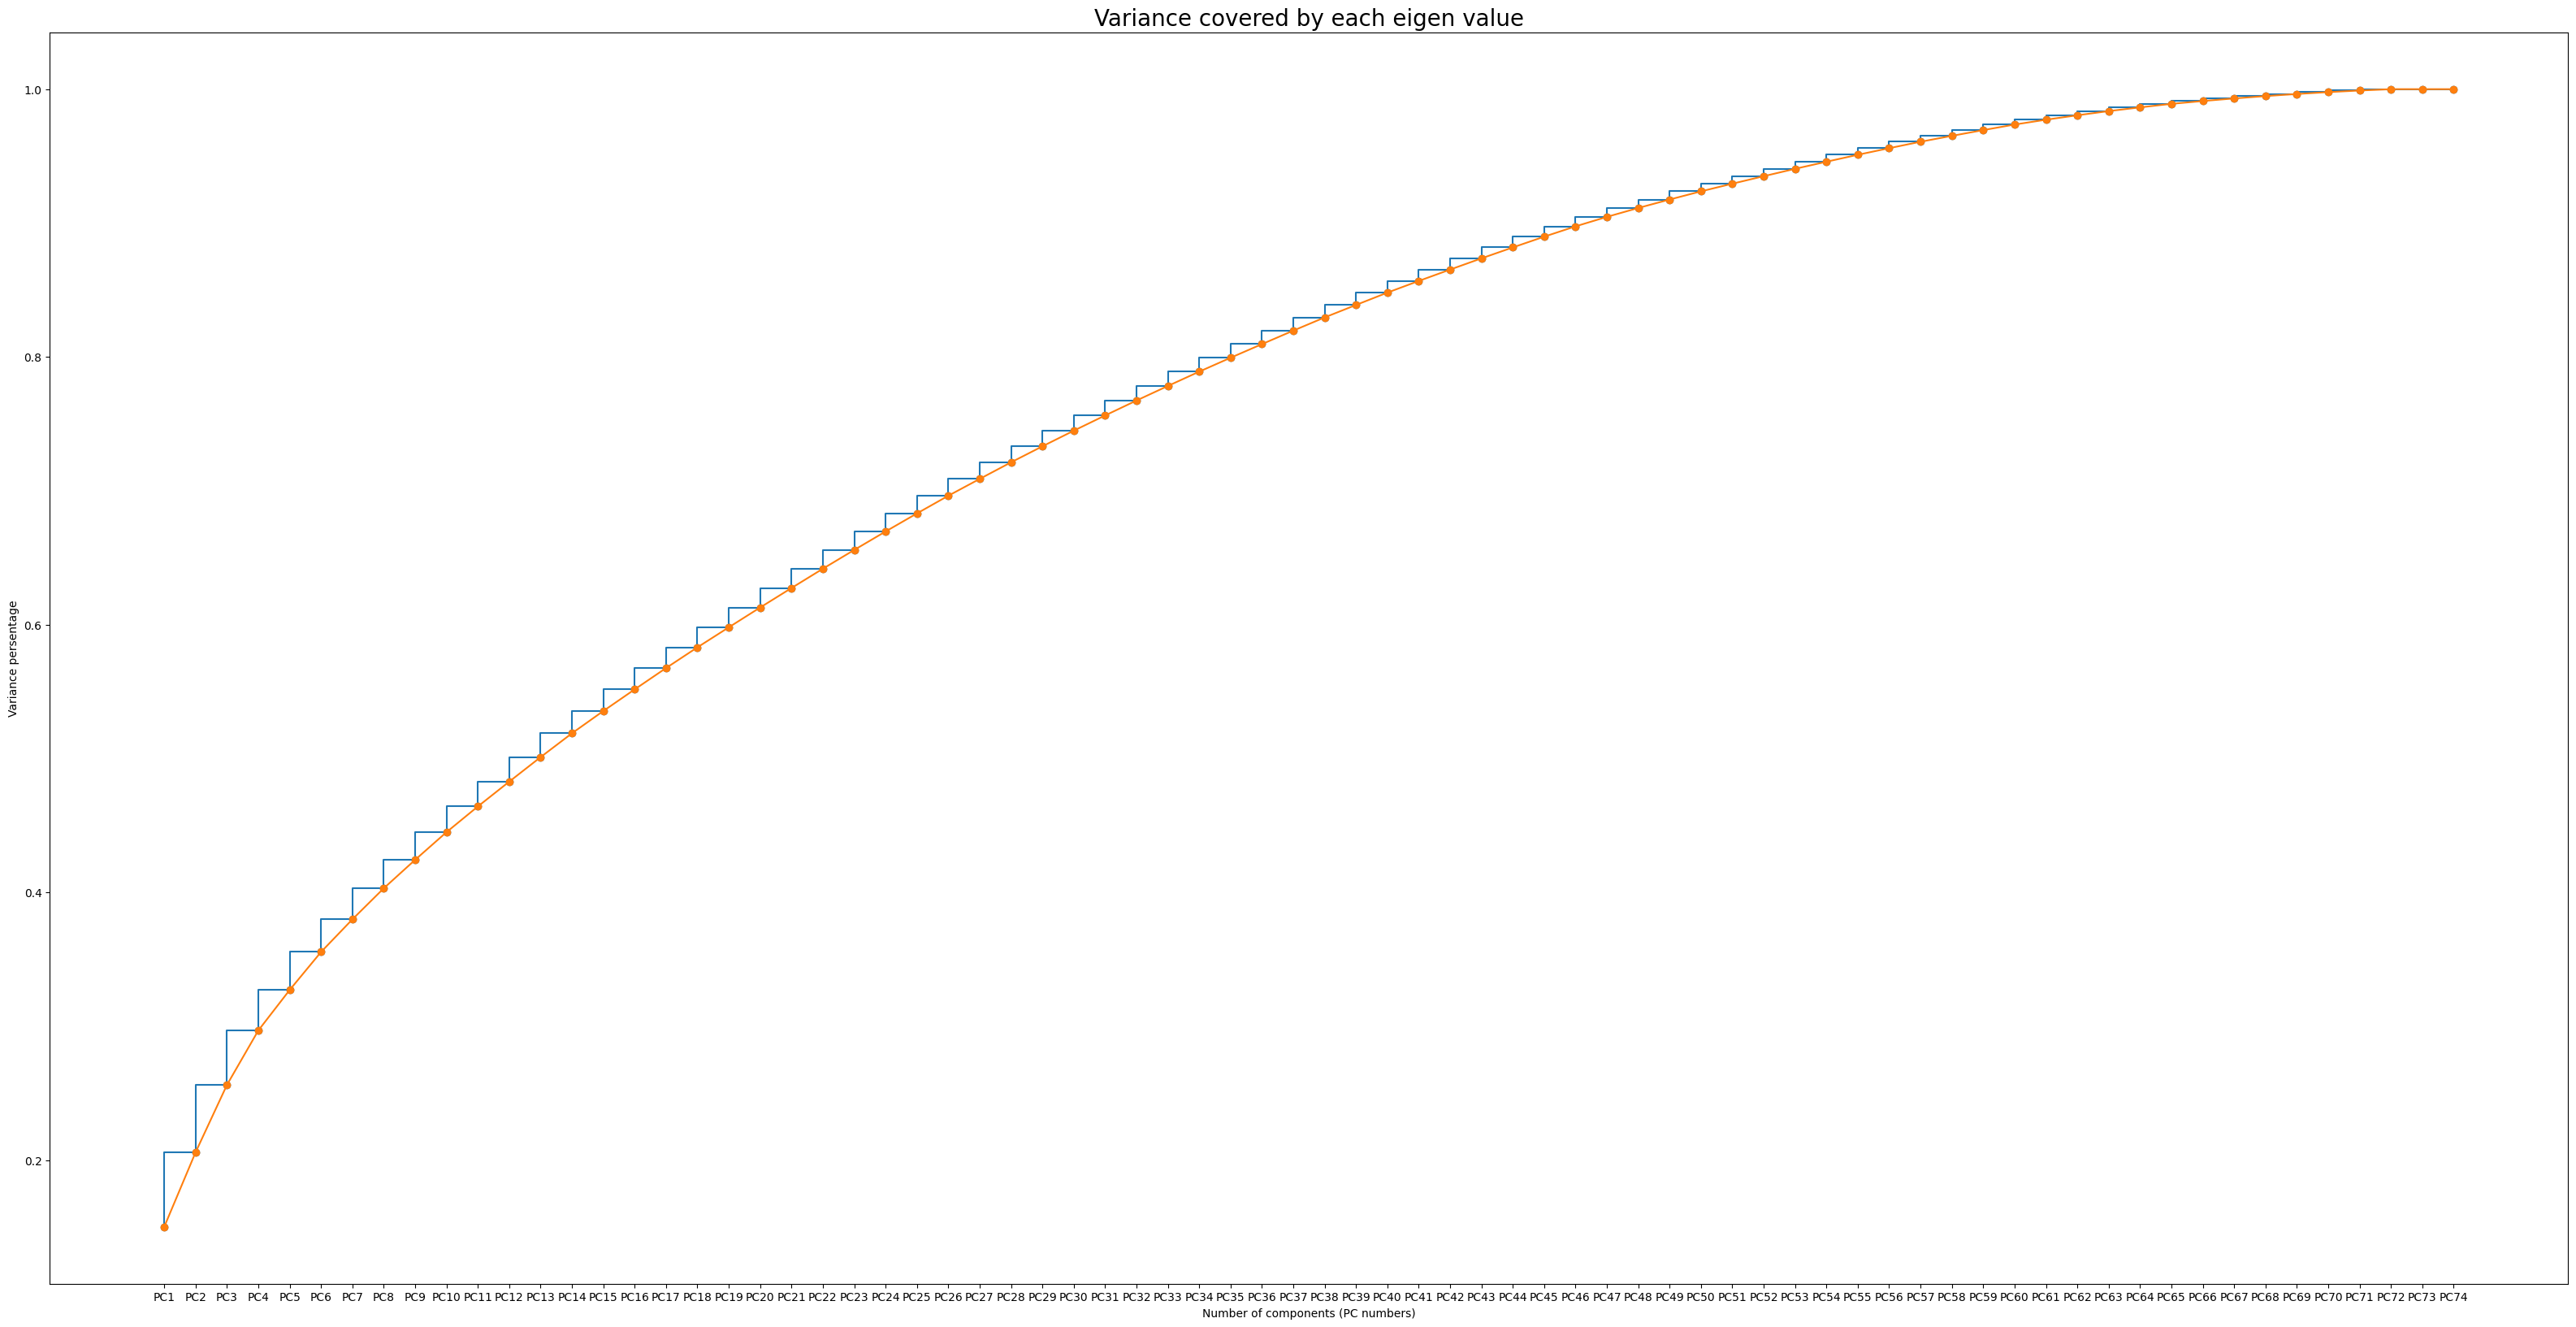

In [ ]:
width = 40
height = 20
plt.figure(figsize=(width, height))
plt.step (df_EVR.PCs , df_EVR.Cumulative_Variance , marker = 'o')
plt.plot(df_EVR.PCs , df_EVR.Cumulative_Variance , marker = 'o')

plt.title('Variance covered by each eigen value', fontsize = 20)
plt.xlabel('Number of components (PC numbers)')
plt.ylabel('Variance persentage')
plt.show()

In [ ]:
index_90 = np.argmax(df_EVR['Cumulative_Variance'] >= 0.9)
num_components_90 = df_EVR['PCs'].iloc[index_90]
print("Number of components for 90% cumulative variance:", num_components_90)

Number of components for 90% cumulative variance: PC47


In [ ]:
index_95 = np.argmax(df_EVR['Cumulative_Variance'] >= 0.95)
num_components_95 = df_EVR['PCs'].iloc[index_95]
print("Number of components for 95% cumulative variance:", num_components_95)

Number of components for 95% cumulative variance: PC55


**Around 90 % of variance is the usual and good percentage for eigen value Also the elbow of explained_variance_ratio plot shows us 47 for the number of components So we could choose n_components=47**

#4) Select principal components

In [ ]:
# Create a dictionary where keys are eigenvalues and values are eigenvectors
eigen_dict = {eigenvalues[i]: eigenvectors[:, i] for i in range(len(eigenvalues))}
sorted_eigen_dict = dict(sorted(eigen_dict.items(), key=lambda x: x[0], reverse=True))
top_47_eigenvalues = list(sorted_eigen_dict.keys())[:47]
top_47_eigenvectors = [sorted_eigen_dict[eigenval] for eigenval in top_47_eigenvalues]
selected_eigenvectors = np.column_stack(top_47_eigenvectors)
selected_eigenvectors.shape

(74, 47)

#5) Project the data onto the new feature space

In [ ]:
# Project data
data_projected = np.dot(df_scaled, selected_eigenvectors)*-1
data_projected_df = pd.DataFrame(data_projected, columns=[f'PC{i+1}' for i in range(47)])
data_projected_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47
0,2.045567,0.080766,1.916044,1.685492,0.562101,0.901687,0.888472,0.034507,1.779235,0.884801,...,-0.140161,0.297455,-0.606370,0.342132,0.138406,-0.806003,-0.395355,-0.251971,0.258734,0.116917
1,-0.259838,-1.691665,-1.467663,0.296554,0.824605,-0.533319,1.219609,-0.421894,-0.545179,-0.782425,...,-0.789009,0.358703,0.004655,-0.453428,0.238790,-0.575056,0.842033,0.238589,-0.969650,0.180469
2,2.458966,0.002487,1.506307,1.426178,0.986801,1.032640,0.278186,-0.560617,1.216970,0.396508,...,0.374365,-0.573806,-0.321949,0.992619,-0.240131,0.074094,-0.651373,-0.273124,0.421037,-0.024437
3,-1.772150,1.640982,-0.771612,0.295777,0.318260,1.490473,0.291370,0.960766,1.887751,1.386470,...,0.867076,1.438768,1.915946,0.615119,-1.411188,1.471899,-1.096695,0.387810,-0.517021,-0.231770
4,4.801733,1.309619,-0.043176,1.756818,0.726325,0.793910,0.030731,-0.383093,1.583747,0.899951,...,0.601791,-0.503276,0.392647,0.035375,-0.152235,-0.226356,0.019627,0.122384,0.244548,-0.780451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.850358,1.310234,2.872579,0.257713,1.472712,-0.107953,-0.729990,-0.235302,0.522750,0.008736,...,-0.025965,0.051374,-0.490343,0.304366,0.184443,0.692298,0.530573,-0.272934,-0.109491,-0.121781
1334,0.628463,-1.204507,-3.278151,-0.426360,0.328870,-0.599588,-0.223935,1.456413,0.451619,-0.617192,...,0.477579,0.275482,0.561054,0.603235,-0.720649,-0.145465,0.050520,-0.342644,-1.105974,-0.024629
1335,1.105974,2.812392,-0.487596,1.279983,0.757148,-0.442299,2.835617,-0.041946,-3.079704,-2.312404,...,1.165735,2.076151,0.466066,0.808117,-0.476660,0.145361,-0.358571,-1.603681,0.444638,0.109765
1336,-3.448190,-2.527593,-2.102523,-0.445990,0.689506,0.393540,-0.104851,3.685344,-1.111068,0.118170,...,-0.588094,0.339710,0.662928,-0.227859,1.292629,0.058418,0.316035,2.152089,-0.371655,-0.415429


#PCA using Predefined functions

In [ ]:
from sklearn.preprocessing import StandardScaler
#Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled_2 = pd.DataFrame(scaled_features, columns=df.columns)

In [ ]:
from sklearn.decomposition import PCA
PCA = PCA()
df_PCA = pd.DataFrame(PCA.fit_transform(df_scaled_2))

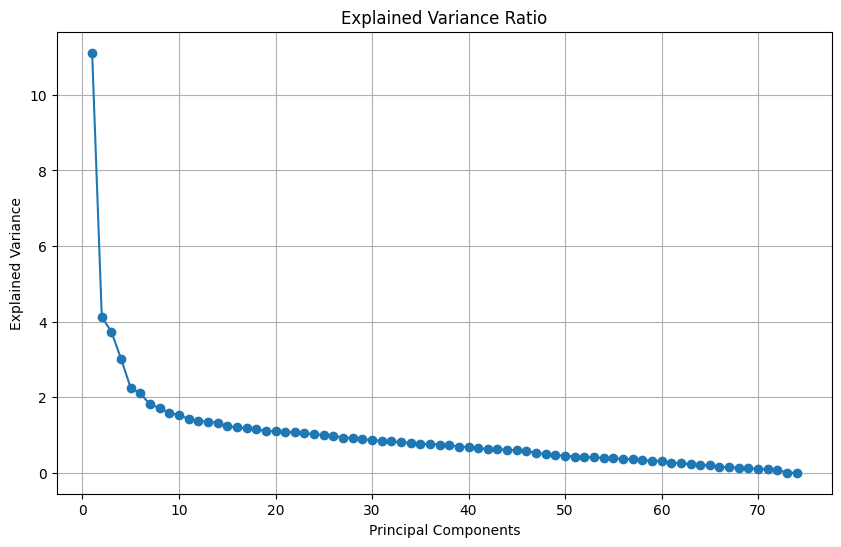

In [ ]:
explained_variance = PCA.explained_variance_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

**Note that**:

Given $\lambda_i$ as the eigenvalue corresponding to the $i$-th principal component, and $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_n$ where $n$ is the number of principal components, the explained variance for the $i$-th principal component is:

$$
\text{Explained Variance} = \frac{\lambda_i}{\sum_{j=1}^{n} \lambda_j}
$$

In [ ]:
EVR = PCA.explained_variance_ratio_
PCs = [f'PC{i}' for i in range(1, len(explained_variance_ratio) + 1)]

df_EVR_2 = pd.DataFrame({
    'PCs': PCs,
    'explained_variance_ratio': EVR
})
df_EVR_2['Cumulative_Variance'] = df_EVR_2['explained_variance_ratio'].cumsum()

df_EVR_2

,PCs,explained_variance_ratio,Cumulative_Variance
0,PC1,1.500851e-01,0.150085
1,PC2,5.570929e-02,0.205794
2,PC3,5.034038e-02,0.256135
3,PC4,4.064720e-02,0.296782
4,PC5,3.027713e-02,0.327059
...,...,...,...
69,PC70,1.388848e-03,0.997790
70,PC71,1.190311e-03,0.998980
71,PC72,1.019567e-03,1.000000
72,PC73,2.959908e-32,1.000000


#check weither we obtain the same result

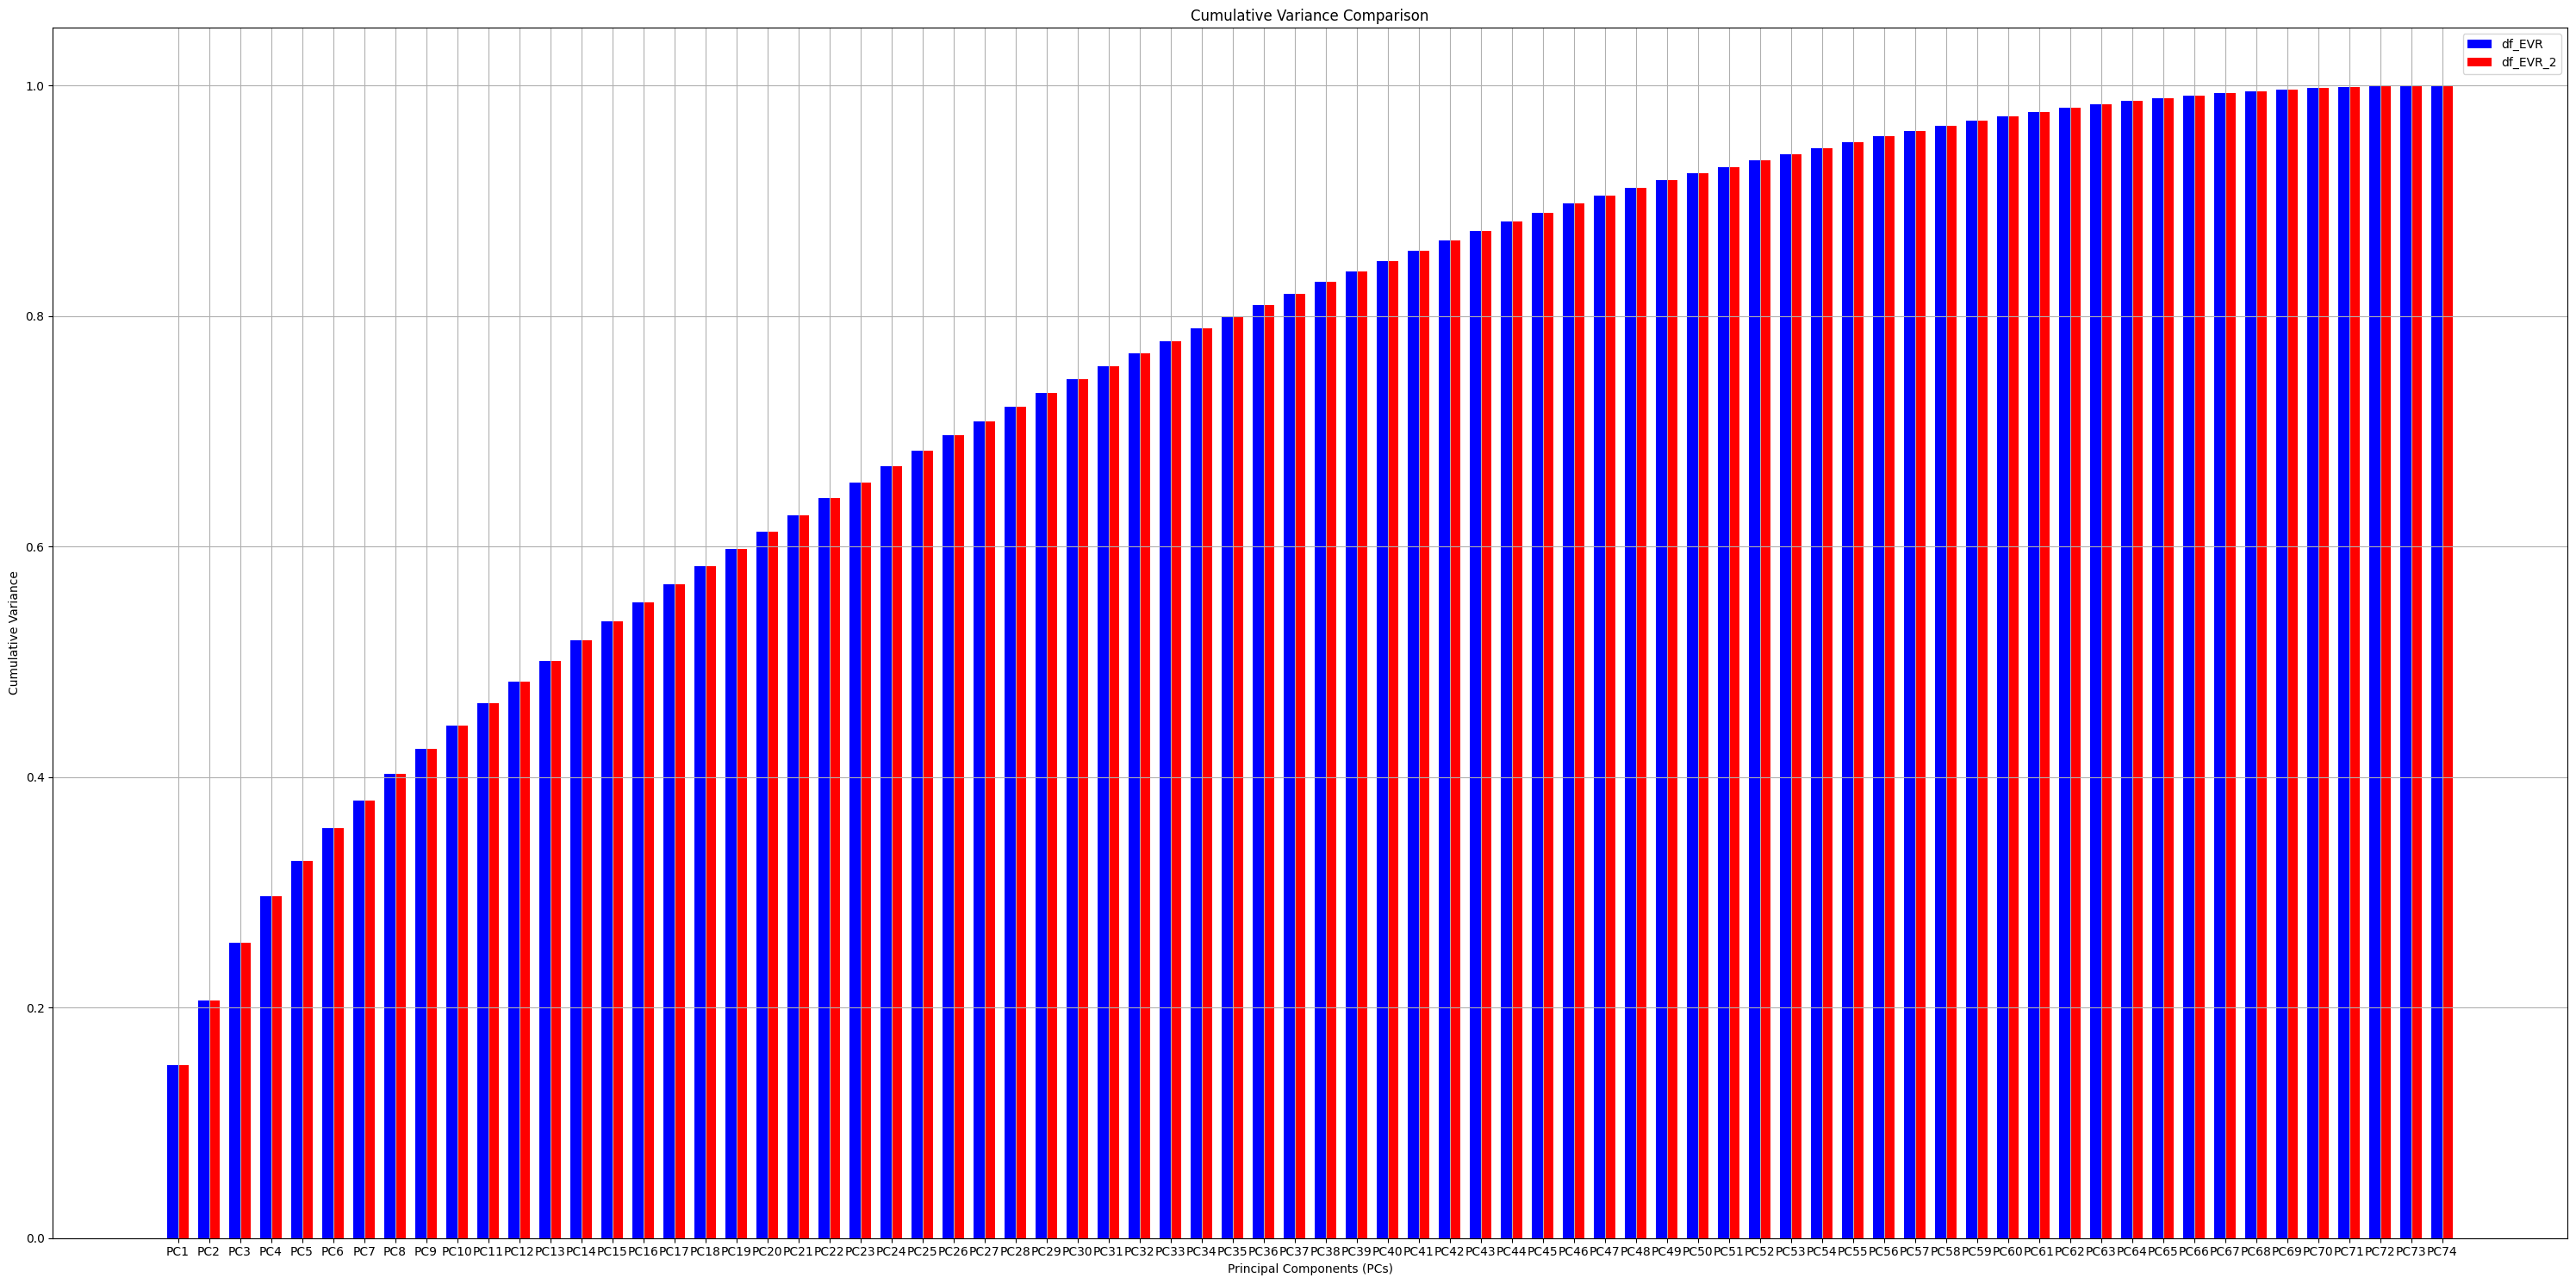

In [ ]:
bar_width = 0.35
x = range(len(df_EVR['PCs']))
plt.figure(figsize=(30, 15))
plt.bar(x, df_EVR['Cumulative_Variance'], width=bar_width, color='blue', label='df_EVR')
plt.bar([i + bar_width for i in x], df_EVR_2['Cumulative_Variance'], width=bar_width, color='red', label='df_EVR_2')

plt.xlabel('Principal Components (PCs)')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance Comparison')
plt.xticks([i + bar_width / 2 for i in x], df_EVR['PCs'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#**Same Result !!**

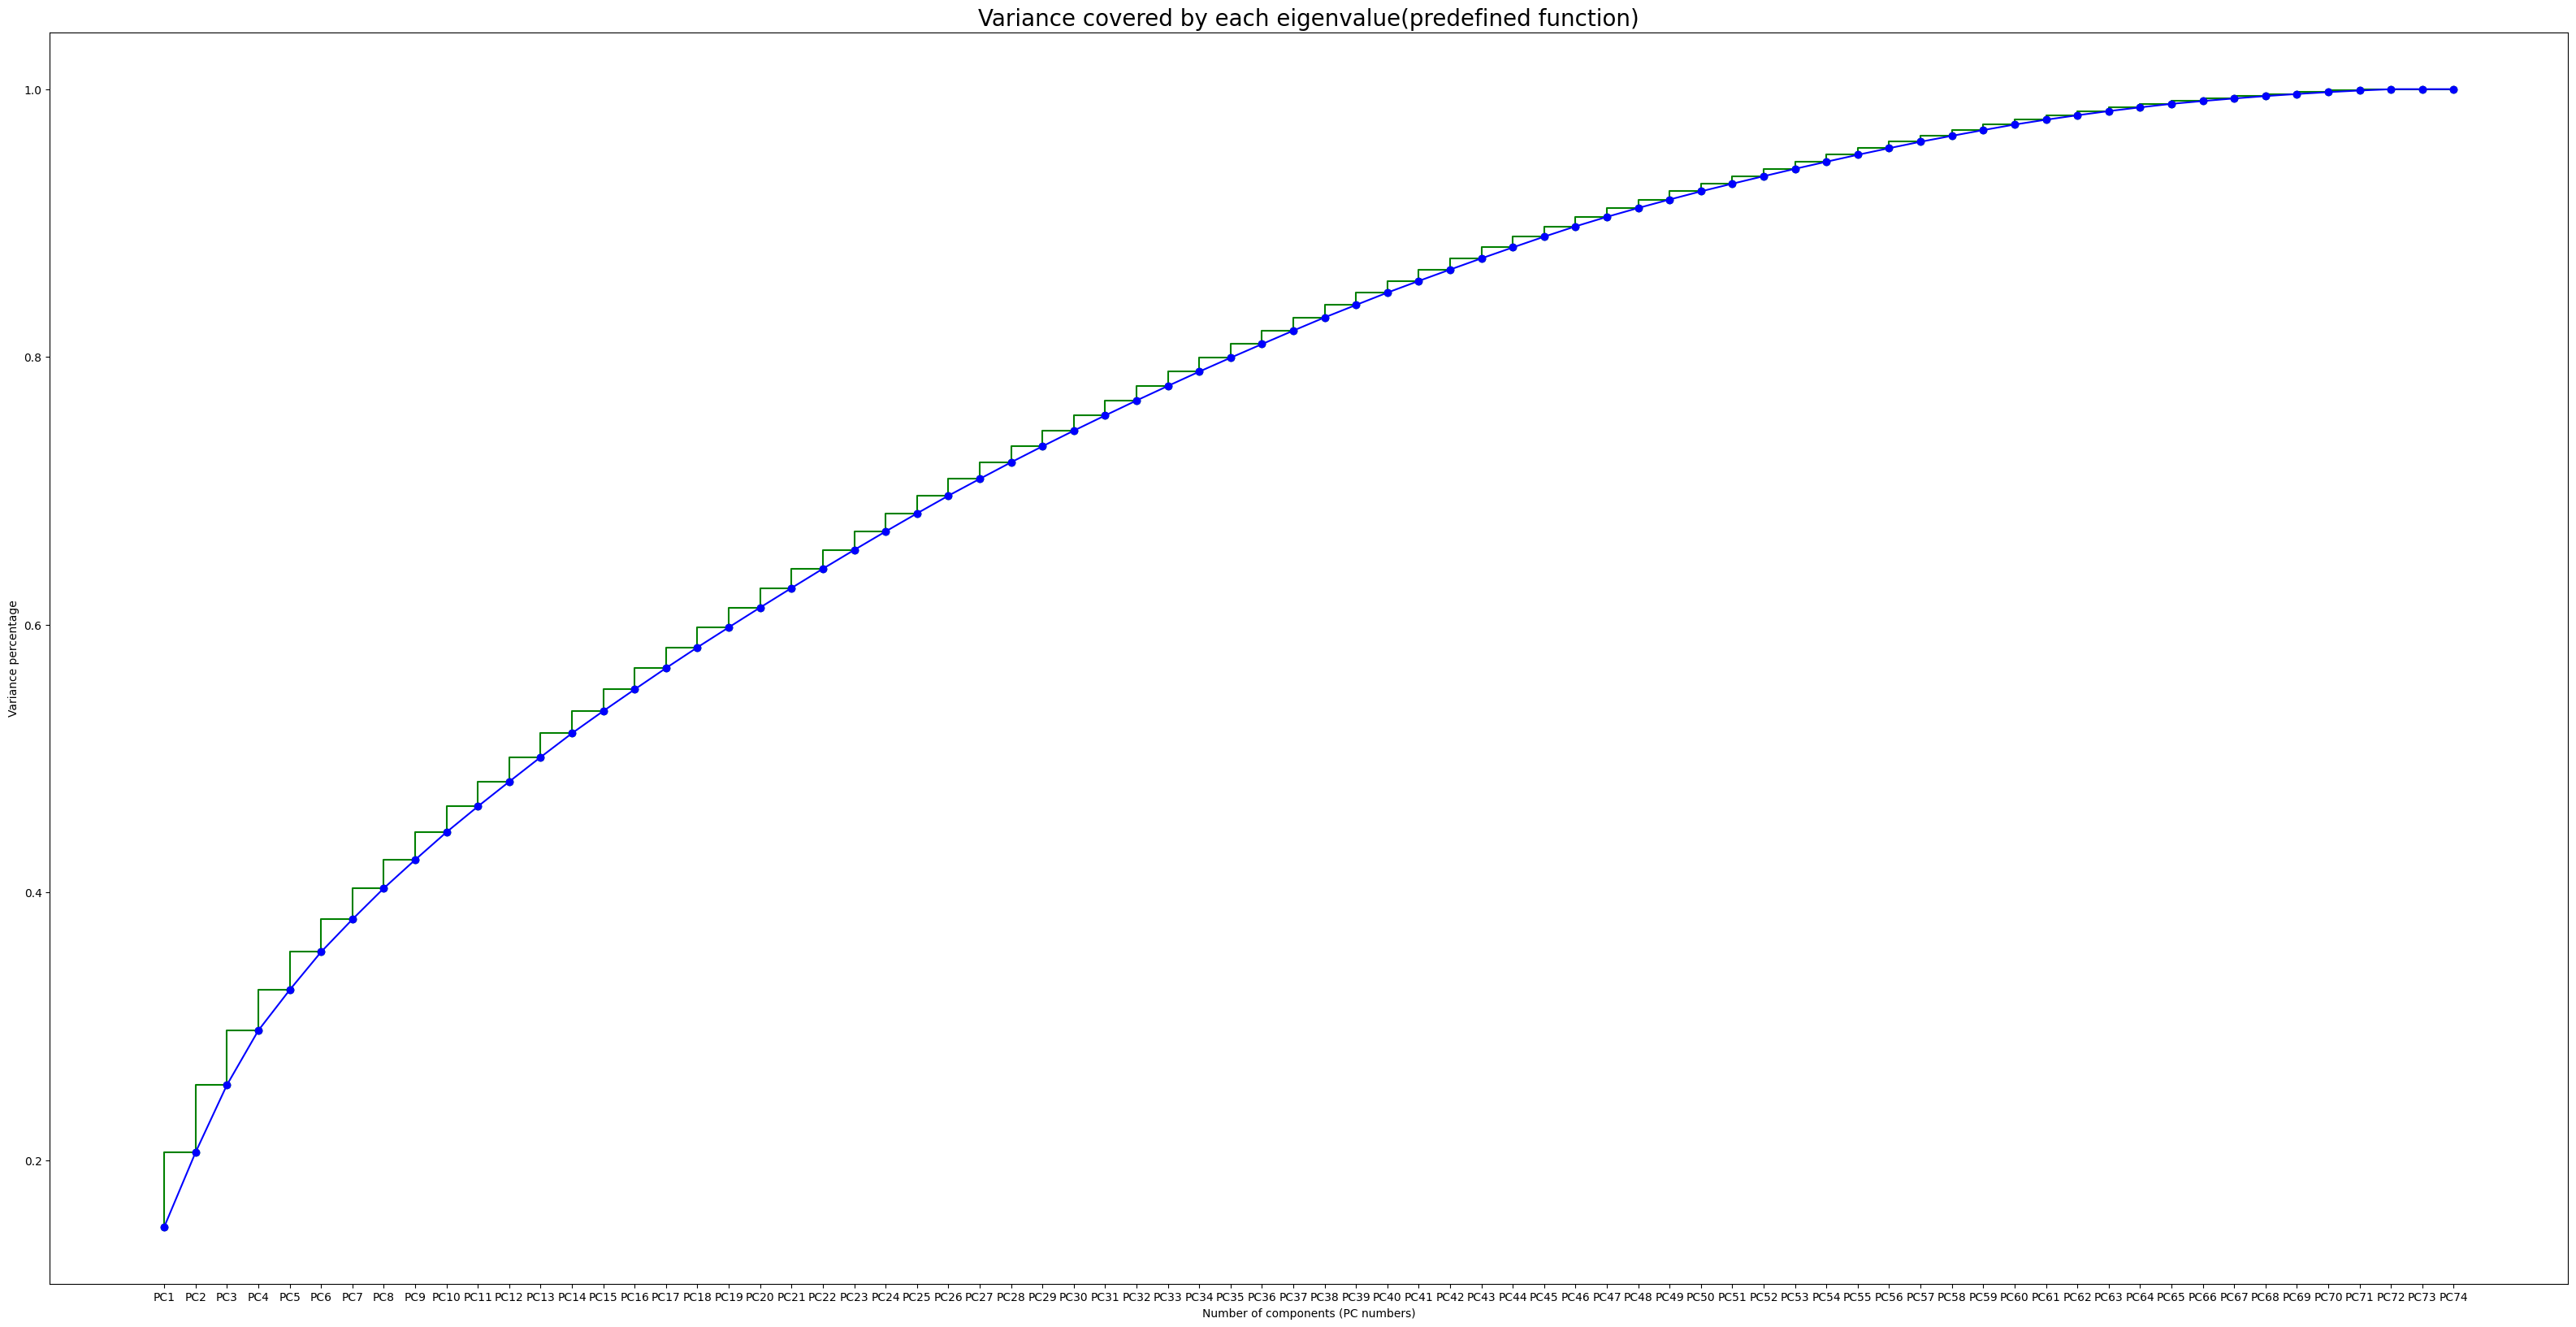

In [ ]:
width = 40
height = 20
plt.figure(figsize=(width, height))
plt.step(df_EVR_2['PCs'], df_EVR_2['Cumulative_Variance'], marker='o', color='green')
plt.plot(df_EVR_2['PCs'], df_EVR_2['Cumulative_Variance'], marker='o', color='blue')

plt.title('Variance covered by each eigenvalue(predefined function)', fontsize=20)
plt.xlabel('Number of components (PC numbers)')
plt.ylabel('Variance percentage')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=47)
pca_df = pd.DataFrame(pca.fit_transform(df_scaled), columns=[f'PC{i}' for i in range(1, 48)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47
0,2.045567,0.080769,-1.916013,-1.685484,-0.562201,0.901723,-0.888393,0.034639,1.779565,0.885006,...,-0.142991,0.292141,-0.621525,0.356920,0.124238,0.840235,-0.393251,-0.298855,0.260649,-0.180099
1,-0.259838,-1.691670,1.467685,-0.296628,-0.824246,-0.533276,-1.219641,-0.422677,-0.544061,-0.783369,...,-0.804084,0.345071,0.012297,-0.487915,0.188548,0.609521,0.814446,0.150916,-0.912187,-0.167443
2,2.458966,0.002487,-1.506269,-1.426186,-0.987015,1.032777,-0.278275,-0.560506,1.217420,0.396945,...,0.381458,-0.585763,-0.332943,1.010209,-0.200177,-0.043596,-0.637844,-0.311596,0.421472,-0.022166
3,-1.772150,1.640994,0.771652,-0.295770,-0.318466,1.490643,-0.291260,0.960874,1.888002,1.386943,...,0.867540,1.473767,1.873106,0.676068,-1.353942,-1.469835,-1.116140,0.422272,-0.512803,0.146756
4,4.801733,1.309620,0.043214,-1.756841,-0.726576,0.794212,-0.030772,-0.383337,1.584253,0.900604,...,0.615213,-0.506891,0.380075,0.030103,-0.137741,0.258249,0.038517,0.059491,0.246388,0.745809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.850358,1.310227,-2.872604,-0.257695,-1.472564,-0.108101,0.730117,-0.235346,0.522554,0.008524,...,-0.031369,0.028956,-0.478965,0.286105,0.186662,-0.712866,0.523613,-0.240730,-0.106344,0.154858
1334,0.628463,-1.204502,3.278149,0.426353,-0.329092,-0.599487,0.223750,1.456444,0.451481,-0.616801,...,0.486505,0.265343,0.557749,0.606162,-0.708138,0.122166,0.043594,-0.353380,-1.130182,0.058622
1335,1.105974,2.812410,0.487627,-1.279997,-0.758253,-0.441868,-2.836669,-0.040940,-3.080654,-2.310196,...,1.206350,2.096812,0.406817,0.895607,-0.364301,-0.149520,-0.316505,-1.702554,0.347424,-0.098367
1336,-3.448190,-2.527570,2.102582,0.445970,-0.689604,0.393584,0.104803,3.685591,-1.111031,0.118558,...,-0.591267,0.424089,0.631702,-0.146303,1.286600,0.047668,0.344805,2.071183,-0.457766,0.396758


#**Now the reduced data is ready to be used in your models so enjoy !!**